In [0]:
import os
import glob
import math
import numpy as np
from keras import optimizers
from keras import applications
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout, Input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [0]:
# 数据集
train_dir = '../input/flower_data/flower_data/train'  # 训练集/Training set
validation_dir = '../input/flower_data/flower_data/valid'  # 验证集/Verification set
img_size = (224, 224)  # 图片大小/size of picture

In [0]:
classes = sorted([o for o in os.listdir(train_dir)])  # 根据文件名分类/Classified by file name

In [0]:
# 定义模型/Defining model
base_model = applications.VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=img_size + (3,)),
                                classes=len(classes))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output 
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.6)(x)  # Droupout 0.6
x = Dense(4096, activation='relu')(x)
x = Dropout(0.6)(x)
predictions = Dense(len(classes), activation='softmax')(x)

model = Model(input=base_model.input, output=predictions) 

model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-5), metrics=['accuracy'])
print(model.summary())

58892288/58889256 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  app.launch_new_instance()


In [0]:
#数据增强/Data enhancement
train_datagen = ImageDataGenerator(rotation_range=30., shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True)  # 30°内随机旋转，0.2几率应用错切，0.2几率缩放内部，水平随机旋转一半图像/Random rotation within 30°, 0.2 chance to apply miscut, 0.2 probability to scale inside, horizontal random rotation half image
train_data = train_datagen.flow_from_directory(train_dir, target_size=img_size, classes=classes)

validation_datagen = ImageDataGenerator()  # 用于验证，无需数据增强/For verification, no data enhancement required
validation_data = validation_datagen.flow_from_directory(validation_dir, target_size=img_size,
                                                         classes=classes)


Found 6552 images belonging to 102 classes.
Found 818 images belonging to 102 classes.


In [0]:
early_stopping = EarlyStopping(verbose=1, patience=30, monitor='val_acc')
model_checkpoint = ModelCheckpoint(filepath='102flowersmodel.h5', verbose=1, save_best_only=True, monitor='val_acc')
callbacks = [early_stopping, model_checkpoint]
nb_epoch = 80  # 迭代次数/Number of iterations
batch_size = 32  # 批量大小/Batch size
hist = model.fit_generator(train_data, steps_per_epoch=nb_train_samples / float(batch_size), epochs=nb_epoch,
                    validation_data=validation_data, validation_steps=nb_validation_samples / float(batch_size),
                    callbacks=callbacks)

print('Training is finished!')

Epoch 1/80
205/204 [==============================] - 142s 691ms/step - loss: 15.5404 - acc: 0.0159 - val_loss: 14.8518 - val_acc: 0.0391

Epoch 00001: val_acc improved from -inf to 0.03912, saving model to 102flowersmodel.h5
Epoch 2/80
205/204 [==============================] - 99s 482ms/step - loss: 15.0355 - acc: 0.0432 - val_loss: 14.1272 - val_acc: 0.0868

Epoch 00002: val_acc improved from 0.03912 to 0.08680, saving model to 102flowersmodel.h5
Epoch 3/80
205/204 [==============================] - 100s 488ms/step - loss: 14.6194 - acc: 0.0670 - val_loss: 13.6192 - val_acc: 0.1149

Epoch 00003: val_acc improved from 0.08680 to 0.11491, saving model to 102flowersmodel.h5
Epoch 4/80
205/204 [==============================] - 99s 485ms/step - loss: 14.1506 - acc: 0.0938 - val_loss: 13.2720 - val_acc: 0.1491

Epoch 00004: val_acc improved from 0.11491 to 0.14914, saving model to 102flowersmodel.h5
Epoch 5/80
205/204 [==============================] - 99s 481ms/step - loss: 13.8324 - ac

205/204 [==============================] - 97s 474ms/step - loss: 6.5905 - acc: 0.4737 - val_loss: 4.6374 - val_acc: 0.6271

Epoch 00037: val_acc improved from 0.60024 to 0.62714, saving model to 102flowersmodel.h5
Epoch 38/80
205/204 [==============================] - 97s 474ms/step - loss: 6.5084 - acc: 0.4711 - val_loss: 4.4852 - val_acc: 0.6333

Epoch 00038: val_acc improved from 0.62714 to 0.63325, saving model to 102flowersmodel.h5
Epoch 39/80
205/204 [==============================] - 97s 473ms/step - loss: 6.1511 - acc: 0.4919 - val_loss: 4.3485 - val_acc: 0.6394

Epoch 00039: val_acc improved from 0.63325 to 0.63936, saving model to 102flowersmodel.h5
Epoch 40/80
205/204 [==============================] - 97s 473ms/step - loss: 5.9503 - acc: 0.5054 - val_loss: 4.1950 - val_acc: 0.6418

Epoch 00040: val_acc improved from 0.63936 to 0.64181, saving model to 102flowersmodel.h5
Epoch 41/80
205/204 [==============================] - 98s 476ms/step - loss: 5.7553 - acc: 0.5096 - val

205/204 [==============================] - 98s 480ms/step - loss: 1.6288 - acc: 0.7336 - val_loss: 1.1273 - val_acc: 0.8130

Epoch 00075: val_acc improved from 0.81174 to 0.81296, saving model to 102flowersmodel.h5
Epoch 76/80
205/204 [==============================] - 98s 477ms/step - loss: 1.5655 - acc: 0.7330 - val_loss: 1.1403 - val_acc: 0.8105

Epoch 00076: val_acc did not improve from 0.81296
Epoch 77/80
205/204 [==============================] - 97s 474ms/step - loss: 1.4227 - acc: 0.7584 - val_loss: 1.1186 - val_acc: 0.8093

Epoch 00077: val_acc did not improve from 0.81296
Epoch 78/80
205/204 [==============================] - 99s 481ms/step - loss: 1.4737 - acc: 0.7566 - val_loss: 1.1229 - val_acc: 0.8105

Epoch 00078: val_acc did not improve from 0.81296
Epoch 79/80
205/204 [==============================] - 98s 476ms/step - loss: 1.4806 - acc: 0.7499 - val_loss: 1.0944 - val_acc: 0.8240

Epoch 00079: val_acc improved from 0.81296 to 0.82396, saving model to 102flowersmodel.

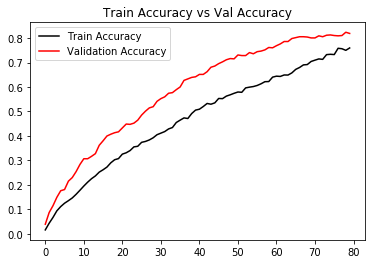

In [0]:
#查看acc与val_acc相互关系/View the relationship between acc and val_acc
import matplotlib.pyplot as plt

plt.title('Train Accuracy vs Val Accuracy')
plt.plot(hist.history['acc'], label='Train Accuracy', color='black')
plt.plot(hist.history['val_acc'], label='Validation Accuracy', color='red')
plt.legend()
plt.show()

In [0]:
from keras.models import load_model
from keras.preprocessing import image
#加载模型/Load model
model = load_model('102flowersmodel.h5')
#将结果以（图片名，分类id）保存到data中/Save the result as (name,id) to data
data = []
path = '../input/flower_data/flower_data/test'
img_height, img_width = 224, 224
imgs = os.listdir(path)
for img in imgs:
    jpgfile = image.load_img(path=path+'/'+img, target_size=(img_height, img_width))
    jpgfile = image.img_to_array(jpgfile)
    jpgfile = jpgfile[None]
    result = model.predict(jpgfile)
    data.append([img,np.argsort(result[0])[-1]])

In [0]:
#导出csv文件/Export CSV file
import csv
import pandas as pd
df = pd.DataFrame(data, columns=['file_name', 'id'])
df.to_csv('submission.csv', index = False)

In [0]:
x = pd.read_csv('submission.csv')
x.head()

,file_name,id
0,image_03989.jpg,43
1,image_06815.jpg,19
2,image_07696.jpg,99
3,image_02677.jpg,56
4,image_02055.jpg,81
